In [1]:
import zipfile
import pandas as pd

# Paths
zip_path = r"C:\Users\Manik Prabhu\Downloads\US_Accidents_March23.csv.zip"
extract_path = r"C:\Users\Manik Prabhu\Downloads"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load CSV
csv_path = r"C:\Users\Manik Prabhu\Downloads\US_Accidents_March23.csv"
df = pd.read_csv(csv_path, low_memory=False)

# Display shape and column names
print(df.shape)
print(df.columns)

(7728394, 46)
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [2]:
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with missing lat/lng (needed for mapping)
df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Optional: take a random sample for performance
df = df.sample(n=100000, random_state=42)

# Check new shape
print(df.shape)


(100000, 46)


C:\Users\Manik Prabhu\AppData\Local\Temp\ipykernel_16268\1418378182.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


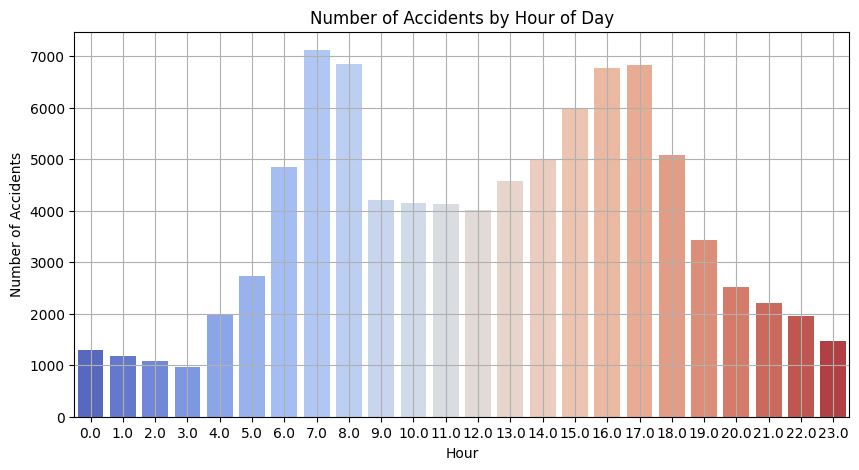

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


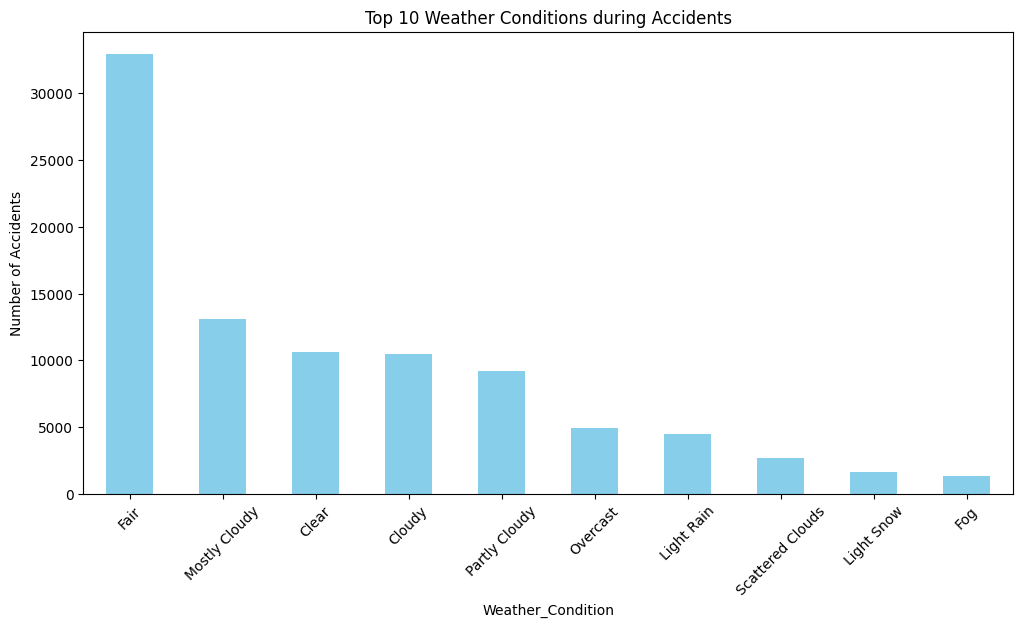

In [4]:
plt.figure(figsize=(12, 6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Weather Conditions during Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


In [5]:
import folium

# Create a base map centered on the average location
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for first 1000 accidents
for idx, row in df.head(1000).iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(accident_map)

# Save map
map_path = r"C:\Users\Manik Prabhu\Downloads\accident_hotspots_map.html"
accident_map.save(map_path)
print(f"✔ Accident hotspot map saved at: {map_path}")


✔ Accident hotspot map saved at: C:\Users\Manik Prabhu\Downloads\accident_hotspots_map.html


In [6]:
# Avg severity by weather
severity_weather = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False).head(10)
print("Average Severity by Weather Condition:\n", severity_weather)

# Avg severity by hour
severity_hour = df.groupby('Hour')['Severity'].mean()
print("\nAverage Severity by Hour:\n", severity_hour)


Average Severity by Weather Condition:
 Weather_Condition
Small Hail                      3.000000
Rain Showers                    3.000000
Widespread Dust                 3.000000
Light Ice Pellets               3.000000
Snow and Sleet                  2.666667
Light Freezing Fog              2.571429
Heavy Thunderstorms and Rain    2.518519
Light Rain Shower               2.500000
Light Thunderstorms and Rain    2.424658
Thunderstorm                    2.396552
Name: Severity, dtype: float64

Average Severity by Hour:
 Hour
0.0     2.249033
1.0     2.198636
2.0     2.241950
3.0     2.269231
4.0     2.262155
5.0     2.238532
6.0     2.223646
7.0     2.203092
8.0     2.199006
9.0     2.243746
10.0    2.221152
11.0    2.226557
12.0    2.242522
13.0    2.229376
14.0    2.223755
15.0    2.229897
16.0    2.229622
17.0    2.227865
18.0    2.258895
19.0    2.243204
20.0    2.256665
21.0    2.258957
22.0    2.274450
23.0    2.220258
Name: Severity, dtype: float64
